In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


from preprocess.acf import *
from preprocess.gaussianize import *

from sklearn.model_selection import train_test_split

path_to_file_prefix = './data/spy_eod2022/spy_eod_2022'
for i in range(1,13):
    if i < 10:
        path_to_file = path_to_file_prefix + '0' + str(i) + '.txt'
    else:
        path_to_file = path_to_file_prefix + str(i) + '.txt'
    df_txt = pd.read_table(path_to_file, sep=', ')
    df_txt.to_csv(path_to_file_prefix + '0' + str(i) + '.csv')

In [6]:
path_to_file_prefix = './data/spy_eod_2022/spy_eod_2022'

calls = pd.DataFrame()

for i in range(1,12):
    if i < 10:
        path_to_file =  path_to_file_prefix + '0' + str(i) + '.csv'
    else:
        path_to_file = path_to_file_prefix + str(i) + '.csv'
    #print(path_to_file)

    monthly_eod = pd.read_csv(path_to_file)
    monthly_eod.dropna(inplace=True)

    calls_monthly = monthly_eod.filter(items=['[QUOTE_DATE]', '[EXPIRE_DATE]', '[DTE]', '[UNDERLYING_LAST]', '[STRIKE]', '[STRIKE_DISTANCE]', '[STRIKE_DISTANCE_PCT]', '[C_DELTA]', '[C_GAMMA]', '[C_VEGA]', '[C_THETA]', '[C_RHO]', '[C_IV]', '[C_VOLUME]', '[C_LAST]', '[C_SIZE]', '[C_BID]', '[C_ASK]'])
    
    calls = pd.concat([calls, calls_monthly], ignore_index=True)
    
    print(calls_monthly.shape)
    #print(calls_df.dtypes)
    #print(path_to_file[-20:])

(63414, 18)
(61293, 18)
(66559, 18)
(53625, 18)
(55314, 18)
(53238, 18)
(48626, 18)
(49713, 18)
(49495, 18)
(51547, 18)
(56708, 18)


rename_dict = {}
for column in calls.columns:
    rename_dict[column] = column[1:]
rename_dict

calls = calls.rename(columns=rename_dict)

In [7]:
calls.to_csv('./data/calls_2022.csv', index=False)

In [89]:
def dateparse(d):
    return pd.Timestamp(d)

file_name = 'calls_2022'
file_path = f'./data/{file_name}.csv'

calls = pd.read_csv(file_path, parse_dates={'QUOTE_DATE': ['[QUOTE_DATE]'], 'EXPIRE_DATE': ['[EXPIRE_DATE]']}, date_parser=dateparse)
#calls = pd.read_csv(file_path)

'''
df = data['[C_LAST]']
fig = plt.figure(figsize=(15,6))
plt.title(f'{file_name} Close', fontsize=20)
plt.plot(data['[QUOTE_DATE]'], data['C_LAST'] )
plt.show()
'''

"\ndf = data['[C_LAST]']\nfig = plt.figure(figsize=(15,6))\nplt.title(f'{file_name} Close', fontsize=20)\nplt.plot(data['[QUOTE_DATE]'], data['C_LAST'] )\nplt.show()\n"

In [90]:
calls.iloc[10:20]

,QUOTE_DATE,EXPIRE_DATE,[DTE],[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_SIZE],[C_BID],[C_ASK]
10,2022-01-03,2022-01-03,0.0,477.77,481.0,3.2,0.007,0.01051,0.01817,0.00635,-0.00504,0.00030,0.06876,6006.0,0.01,0 x 4250,0.0,0.01
11,2022-01-03,2022-01-03,0.0,477.77,482.0,4.2,0.009,0.00869,0.01215,0.00544,-0.00506,-0.00016,0.08637,3015.0,0.01,0 x 4855,0.0,0.01
12,2022-01-03,2022-01-03,0.0,477.77,483.0,5.2,0.011,0.00696,0.00886,0.00392,-0.00539,0.00024,0.10257,1458.0,0.01,0 x 4757,0.0,0.01
13,2022-01-03,2022-01-03,0.0,477.77,484.0,6.2,0.013,0.00575,0.00682,0.00338,-0.00467,0.00039,0.11925,536.0,0.01,0 x 3451,0.0,0.01
14,2022-01-03,2022-01-03,0.0,477.77,485.0,7.2,0.015,0.00572,0.00536,0.00332,-0.00538,0.00014,0.13609,459.0,0.01,0 x 4572,0.0,0.01
15,2022-01-03,2022-01-03,0.0,477.77,486.0,8.2,0.017,0.00448,0.00438,0.00268,-0.00499,0.00043,0.15154,9.0,0.01,0 x 4290,0.0,0.01
16,2022-01-03,2022-01-03,0.0,477.77,487.0,9.2,0.019,0.00404,0.00365,0.00285,-0.00488,-0.00018,0.16742,14.0,0.01,0 x 3673,0.0,0.01
17,2022-01-03,2022-01-03,0.0,477.77,488.0,10.2,0.021,0.00416,0.00308,0.00281,-0.00482,-0.00026,0.18282,29.0,0.01,0 x 3740,0.0,0.01
18,2022-01-03,2022-01-03,0.0,477.77,489.0,11.2,0.024,0.00408,0.00269,0.00262,-0.00454,0.00053,0.19828,1.0,0.01,0 x 3692,0.0,0.01
19,2022-01-03,2022-01-03,0.0,477.77,490.0,12.2,0.026,0.00396,0.00237,0.00220,-0.00473,-0.00012,0.21343,92.0,0.01,0 x 3079,0.0,0.01


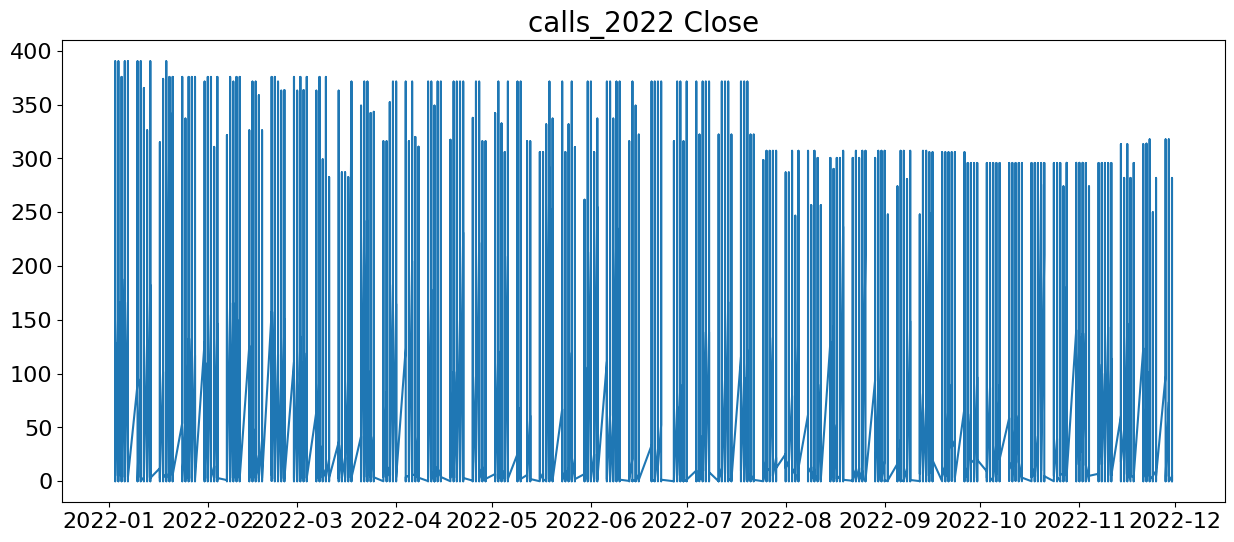

In [91]:
#df = calls['[C_LAST]']
fig = plt.figure(figsize=(15,6))
plt.title(f'{file_name} Close', fontsize=20)
plt.plot(calls['QUOTE_DATE'], calls['[C_LAST]'] )
plt.show()

In [92]:
type(calls['[C_VOLUME]'][0])

numpy.float64

In [93]:
calls.shape

(609532, 18)

In [94]:
# Rounding and Converting DTE
#data['[DTE]'] = data['[DTE]'].round()
#data['[DTE]'] = data['[DTE]'].astype(np.int64)

# Dropping Contracts that are expired
calls.drop(calls[calls['[DTE]'] == 0].index, inplace = True)


In [95]:
calls.sort_values(by=['EXPIRE_DATE', 'QUOTE_DATE'], ascending=True).loc[(calls['EXPIRE_DATE'] == '2022-01-21') & (calls['QUOTE_DATE'] == '2022-01-03')]

,QUOTE_DATE,EXPIRE_DATE,[DTE],[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_SIZE],[C_BID],[C_ASK]
499,2022-01-03,2022-01-21,18.0,477.77,115.0,362.8,0.759,0.99983,0.00005,0.00152,-0.00816,0.02484,2.03046,280.0,360.14,73 x 73,362.51,363.08
500,2022-01-03,2022-01-21,18.0,477.77,120.0,357.8,0.749,0.99992,-0.00002,0.00158,-0.00877,0.02924,1.99655,0.0,358.17,73 x 73,357.52,358.08
501,2022-01-03,2022-01-21,18.0,477.77,125.0,352.8,0.738,0.99382,0.00007,0.01766,-0.12009,0.07580,2.66765,0.0,342.15,73 x 10,352.42,354.42
502,2022-01-03,2022-01-21,18.0,477.77,130.0,347.8,0.728,0.99932,-0.00002,0.00273,-0.01123,0.04006,1.92650,0.0,337.13,73 x 73,347.53,348.09
503,2022-01-03,2022-01-21,18.0,477.77,135.0,342.8,0.717,0.99886,0.00005,0.00233,-0.01206,0.04627,1.87089,0.0,331.96,73 x 73,342.53,343.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2022-01-03,2022-01-21,18.0,477.77,600.0,122.2,0.256,0.00076,0.00002,0.00269,-0.00134,-0.00029,0.30639,0.0,0.01,0 x 3231,0.00,0.01
723,2022-01-03,2022-01-21,18.0,477.77,605.0,127.2,0.266,0.00093,0.00008,0.00223,-0.00163,0.00020,0.31621,0.0,0.01,0 x 3231,0.00,0.01
724,2022-01-03,2022-01-21,18.0,477.77,610.0,132.2,0.277,0.00081,0.00006,0.00242,-0.00147,0.00011,0.32640,0.0,0.01,0 x 3866,0.00,0.01
725,2022-01-03,2022-01-21,18.0,477.77,620.0,142.2,0.298,0.00023,0.00010,0.00234,-0.00178,0.00024,0.34662,0.0,0.01,0 x 3867,0.00,0.01


In [215]:
%reset_selective -f "^call0"

In [195]:
calls.loc[(calls['EXPIRE_DATE'] == '2022-01-14') & (calls['QUOTE_DATE'] == '2022-01-06')]

,QUOTE_DATE,EXPIRE_DATE,[DTE],[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_SIZE],[C_BID],[C_ASK]
9209,2022-01-06,2022-01-14,8.0,467.93,300.0,167.9,0.359,0.99520,0.00012,0.00906,-0.05496,0.07104,1.13926,21.0,168.53,50 x 53,167.76,168.38
9210,2022-01-06,2022-01-14,8.0,467.93,315.0,152.9,0.327,1.00000,0.00000,0.00000,-0.00232,0.07541,0.00009,1.0,153.82,16 x 20,152.74,153.15
9211,2022-01-06,2022-01-14,8.0,467.93,320.0,147.9,0.316,0.99977,0.00005,0.00013,-0.00269,0.07691,0.66311,1.0,148.49,50 x 20,147.74,148.16
9212,2022-01-06,2022-01-14,8.0,467.93,325.0,142.9,0.305,0.99727,0.00015,0.00541,-0.02403,0.07743,0.85602,0.0,153.04,50 x 50,142.81,143.18
9213,2022-01-06,2022-01-14,8.0,467.93,330.0,137.9,0.295,0.99814,0.00013,0.00519,-0.02182,0.07865,0.81382,130.0,138.02,50 x 50,137.80,138.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,2022-01-06,2022-01-14,8.0,467.93,477.5,9.6,0.020,0.12864,0.02545,0.15217,-0.09961,0.01419,0.11474,1053.0,0.50,1002 x 667,0.52,0.54
9304,2022-01-06,2022-01-14,8.0,467.93,478.0,10.1,0.022,0.11464,0.02359,0.14054,-0.09032,0.01276,0.11377,1235.0,0.48,77 x 99,0.45,0.46
9305,2022-01-06,2022-01-14,8.0,467.93,479.0,11.1,0.024,0.09033,0.02010,0.11718,-0.07368,0.00981,0.11226,692.0,0.33,10 x 309,0.33,0.34
9306,2022-01-06,2022-01-14,8.0,467.93,480.0,12.1,0.026,0.06972,0.01679,0.09721,-0.05940,0.00750,0.11050,4254.0,0.25,360 x 785,0.24,0.25


In [196]:
calls.loc[(calls['EXPIRE_DATE'] == '2022-01-14')]

,QUOTE_DATE,EXPIRE_DATE,[DTE],[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_SIZE],[C_BID],[C_ASK]
280,2022-01-03,2022-01-14,11.0,477.77,315.0,162.8,0.341,0.91359,0.00002,0.09755,-0.03573,3.83963,1.44709,0.0,163.11,50 x 69,162.58,163.03
281,2022-01-03,2022-01-14,11.0,477.77,320.0,157.8,0.330,0.91563,0.00004,0.09778,-0.07474,3.72621,1.38455,0.0,157.93,69 x 104,157.56,158.13
282,2022-01-03,2022-01-14,11.0,477.77,325.0,152.8,0.320,0.91626,0.00006,0.09716,-0.09517,3.62245,1.32284,0.0,153.04,69 x 104,152.61,153.12
283,2022-01-03,2022-01-14,11.0,477.77,330.0,147.8,0.309,0.91832,0.00004,0.09690,-0.02983,3.57311,1.25348,0.0,147.96,50 x 104,147.57,148.03
284,2022-01-03,2022-01-14,11.0,477.77,335.0,142.8,0.299,0.91996,0.00006,0.09714,-0.11046,3.43112,1.20156,0.0,143.13,25 x 69,142.63,143.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24317,2022-01-13,2022-01-14,1.0,464.78,535.0,70.2,0.151,0.00070,0.00019,0.00083,-0.00538,-0.00029,0.65106,0.0,0.01,0 x 3963,0.00,0.01
24318,2022-01-13,2022-01-14,1.0,464.78,540.0,75.2,0.162,0.00100,0.00011,0.00058,-0.00523,-0.00020,0.68966,0.0,0.01,0 x 3630,0.00,0.01
24319,2022-01-13,2022-01-14,1.0,464.78,545.0,80.2,0.173,0.00108,0.00008,0.00089,-0.00530,-0.00044,0.72802,0.0,0.01,0 x 4011,0.00,0.01
24320,2022-01-13,2022-01-14,1.0,464.78,550.0,85.2,0.183,0.00115,0.00013,0.00123,-0.00454,0.00007,0.76632,0.0,0.01,0 x 3633,0.00,0.01


In [216]:
call060122_exp070122 = calls.loc[(calls['EXPIRE_DATE'] == '2022-01-07') & (calls['QUOTE_DATE'] == '2022-01-06')]

In [199]:
call_exp140122 = calls.loc[(calls['EXPIRE_DATE'] == '2022-01-14')]

In [217]:
# Get midprices from bid/asks
print(call060122_exp070122.shape)
call060122_exp070122["Midprice"] = (call060122_exp070122['[C_BID]'] + call060122_exp070122['[C_ASK]'])/2
call060122_exp070122 = call060122_exp070122[call060122_exp070122["Midprice"] > 0]
call060122_exp070122.shape

(82, 18)


C:\Users\samde\AppData\Local\Temp\ipykernel_5192\1607154358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call060122_exp070122["Midprice"] = (call060122_exp070122['[C_BID]'] + call060122_exp070122['[C_ASK]'])/2


(82, 19)

In [230]:
call060122_exp070122.iloc[25:35]

,QUOTE_DATE,EXPIRE_DATE,[DTE],[UNDERLYING_LAST],[STRIKE],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_VOLUME],[C_LAST],[C_SIZE],[C_BID],[C_ASK],Midprice
9068,2022-01-06,2022-01-07,1.0,467.93,411.0,56.9,0.122,0.98935,0.00107,0.00883,-0.09705,0.01899,0.82534,0.0,66.21,10 x 300,56.90,57.16,57.030
9069,2022-01-06,2022-01-07,1.0,467.93,412.0,55.9,0.120,0.99018,0.00104,0.00904,-0.09192,0.01976,0.80500,0.0,47.61,10 x 300,55.89,56.16,56.025
9070,2022-01-06,2022-01-07,1.0,467.93,414.0,53.9,0.115,0.98874,0.00110,0.00927,-0.09656,0.01939,0.78446,0.0,63.49,300 x 20,53.92,54.14,54.030
9071,2022-01-06,2022-01-07,1.0,467.93,416.0,51.9,0.111,0.98955,0.00113,0.00917,-0.08692,0.01957,0.74657,0.0,60.77,30 x 20,51.90,52.14,52.020
9072,2022-01-06,2022-01-07,1.0,467.93,417.0,50.9,0.109,1.00000,0.00000,0.00000,-0.00242,0.02024,-0.00004,0.0,48.05,46 x 300,50.68,51.18,50.930
9073,2022-01-06,2022-01-07,1.0,467.93,418.0,49.9,0.107,0.98399,0.00160,0.01264,-0.14594,0.01935,0.77440,0.0,52.55,300 x 300,49.87,50.29,50.080
9074,2022-01-06,2022-01-07,1.0,467.93,419.0,48.9,0.105,1.00000,0.00000,0.00000,-0.00248,0.01962,0.00046,10.0,50.03,46 x 300,48.68,49.18,48.930
9075,2022-01-06,2022-01-07,1.0,467.93,420.0,47.9,0.102,0.99071,0.00109,0.00813,-0.06736,0.01969,0.66916,8.0,48.06,20 x 20,47.86,48.14,48.000
9076,2022-01-06,2022-01-07,1.0,467.93,422.0,45.9,0.098,1.00000,0.00000,0.00000,-0.00302,0.01961,0.00026,0.0,49.80,36 x 300,45.71,46.16,45.935
9077,2022-01-06,2022-01-07,1.0,467.93,423.0,44.9,0.096,1.00000,0.00000,0.00000,-0.00304,0.01969,-0.00034,0.0,46.75,36 x 300,44.71,45.16,44.935


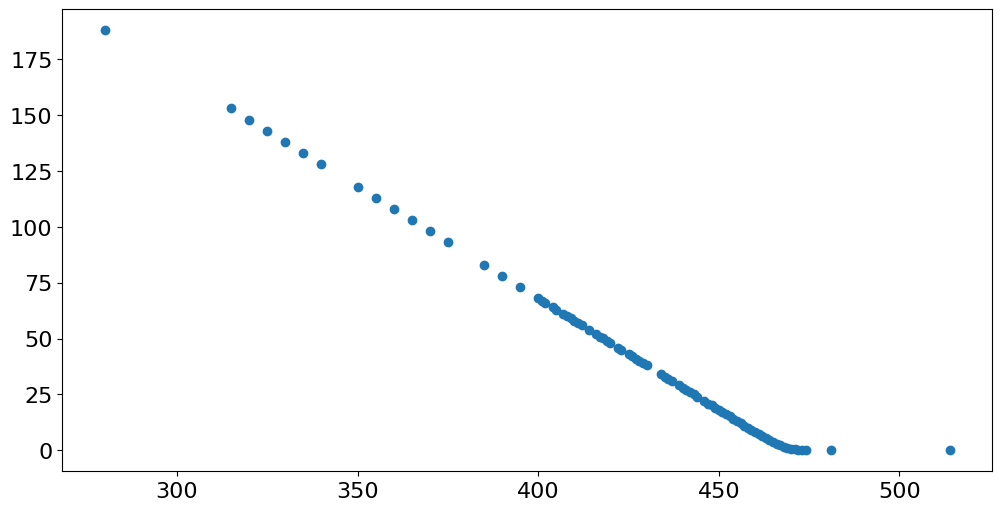

In [219]:
# Visualise put and call prices

'''
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.scatter(calls.strike, calls.midprice);
ax1.scatter(puts.strike, puts.midprice);
'''
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(call060122_exp070122['[STRIKE]'], call060122_exp070122['Midprice'])

plt.show()

In [222]:
import math

# Construct butterflies
data = []

for (_, left) ,(_,centre), (_, right) in zip(call060122_exp070122.iterrows(), call060122_exp070122.iloc[1:].iterrows(), call060122_exp070122.iloc[2:].iterrows()):
    # Filter out all zero volume
    if not any(vol > 0 for vol in {left['[C_VOLUME]'], centre['[C_VOLUME]'], right['[C_VOLUME]']}):
        continue

    '''
    # No Open Interest in Dataset 
    # Filter out any zero open interest
    if not all(oi > 0 for oi in {left.openInterest, centre.openInterest, right.openInterest}):
        continue
    '''
    # Equidistant on either end
    if centre['[STRIKE]'] - left['[STRIKE]'] != right['[STRIKE]'] - centre['[STRIKE]']:
        continue

    butterfly_price = left['Midprice'] - (2* centre['Midprice']) + right['Midprice']
    max_profit = centre['[STRIKE]'] - left['[STRIKE]']
    data.append([centre['[STRIKE]'], butterfly_price, max_profit])

bflys = pd.DataFrame(data, columns=['STRIKE', 'PRICE', 'MaxProfit'])
bflys['Prob'] = (math.exp(0.03*(1/365))) * (bflys.PRICE / bflys.MaxProfit**2)
bflys

,STRIKE,PRICE,MaxProfit,Prob
0,355.0,-0.015,5.0,-0.000600
1,370.0,-0.090,5.0,-0.003600
2,395.0,0.110,5.0,0.004400
3,401.0,0.230,1.0,0.230019
4,408.0,0.040,1.0,0.040003
5,409.0,-0.060,1.0,-0.060005
6,410.0,0.025,1.0,0.025002
7,411.0,-0.020,1.0,-0.020002
8,418.0,-0.300,1.0,-0.300025
9,419.0,0.220,1.0,0.220018


In [225]:
data

[[355.0, -0.015000000000000568, 5.0],
 [370.0, -0.08999999999997499, 5.0],
 [395.0, 0.10999999999998522, 5.0],
 [401.0, 0.22999999999997556, 1.0],
 [408.0, 0.040000000000020464, 1.0],
 [409.0, -0.060000000000016485, 1.0],
 [410.0, 0.025000000000005684, 1.0],
 [411.0, -0.020000000000003126, 1.0],
 [418.0, -0.29999999999999716, 1.0],
 [419.0, 0.21999999999999886, 1.0],
 [426.0, -0.030000000000001137, 1.0],
 [428.0, 0.04000000000000625, 1.0],
 [429.0, -0.07000000000000739, 1.0],
 [435.0, 0.01999999999999602, 1.0],
 [436.0, -0.035000000000003695, 1.0],
 [440.0, 0.240000000000002, 1.0],
 [441.0, -0.08999999999999986, 1.0],
 [442.0, 0.005000000000002558, 1.0],
 [443.0, -0.005000000000002558, 1.0],
 [447.0, 0.23499999999999943, 1.0],
 [448.0, -0.1750000000000007, 1.0],
 [449.0, -0.005000000000002558, 1.0],
 [450.0, 0.05000000000000426, 1.0],
 [451.0, -0.015000000000000568, 1.0],
 [452.0, 0.009999999999999787, 1.0],
 [453.0, -0.20500000000000007, 1.0],
 [454.0, 0.2599999999999998, 1.0],
 [455.

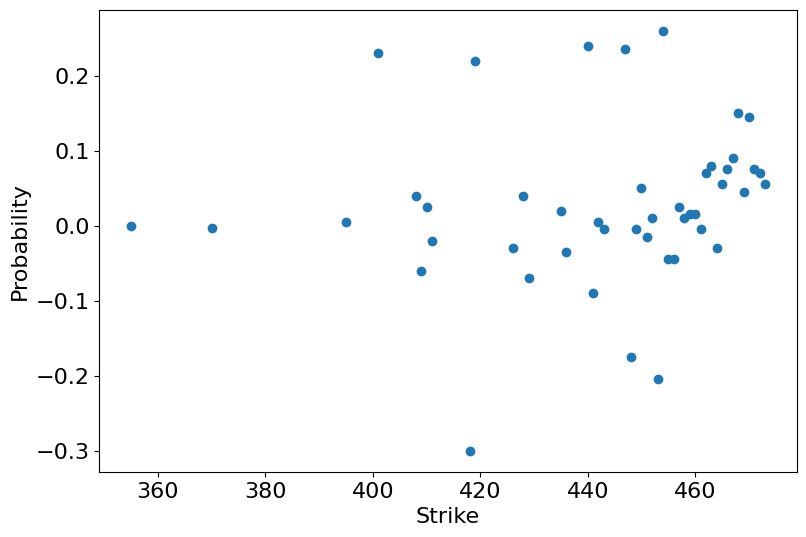

In [223]:
# SPY was trading around 4795.57 when this data was collected
#plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(9,6))
plt.scatter(bflys.STRIKE, bflys.Prob)
plt.xlabel("Strike")
plt.ylabel("Probability")
plt.show()

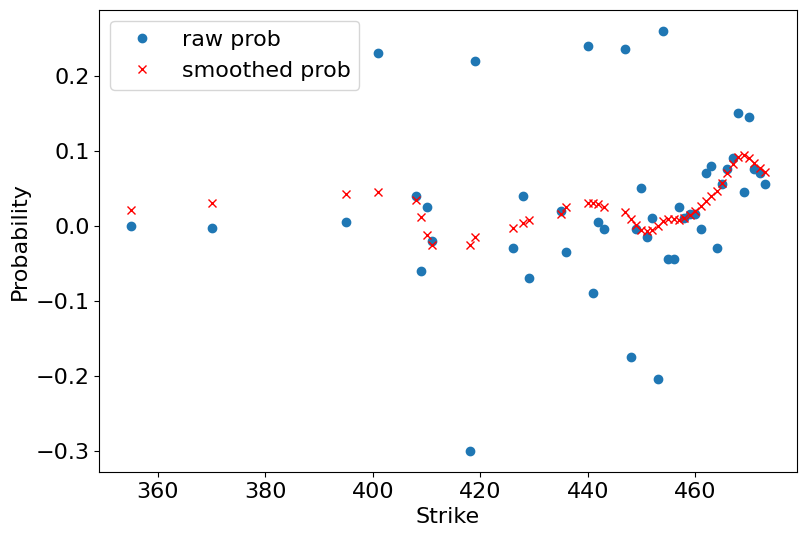

In [224]:
from scipy.ndimage import gaussian_filter1d

smoothed_prob = gaussian_filter1d(bflys.Prob, 2)

plt.figure(figsize=(9,6))
plt.plot(bflys.STRIKE, bflys.Prob, "o", bflys.STRIKE, smoothed_prob, "rx")
plt.legend(["raw prob", "smoothed prob"], loc="best")
plt.xlabel("Strike")
plt.ylabel("Probability")
plt.show()

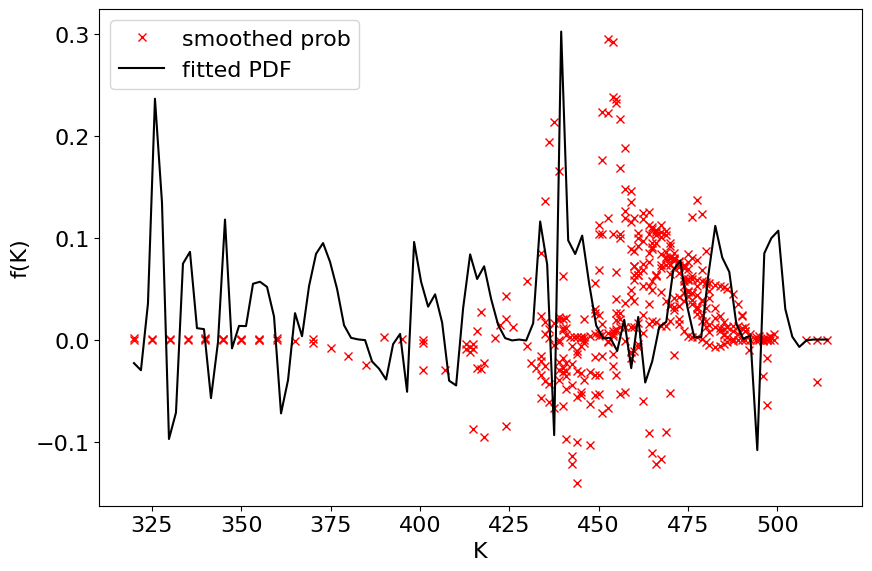

In [207]:
import scipy

plt.figure(figsize=(9,6))
pdf = scipy.interpolate.interp1d(np.linspace(bflys['STRIKE'].min(), bflys['STRIKE'].max(), len(smoothed_prob)), smoothed_prob, kind="cubic",
                                 fill_value="extrapolate")
x_new = np.linspace(bflys['STRIKE'].min(), bflys['STRIKE'].max(), 100)
plt.plot(bflys['STRIKE'], smoothed_prob, "rx", x_new, pdf(x_new), "k-")
plt.legend(["smoothed prob", "fitted PDF"], loc="best")
plt.xlabel("K")
plt.ylabel("f(K)")
plt.tight_layout()
plt.show()

Yo (10,) (10,)
Yo (10,) (10,)
Yo (10,) (10,)
Yo (10,) (10,)


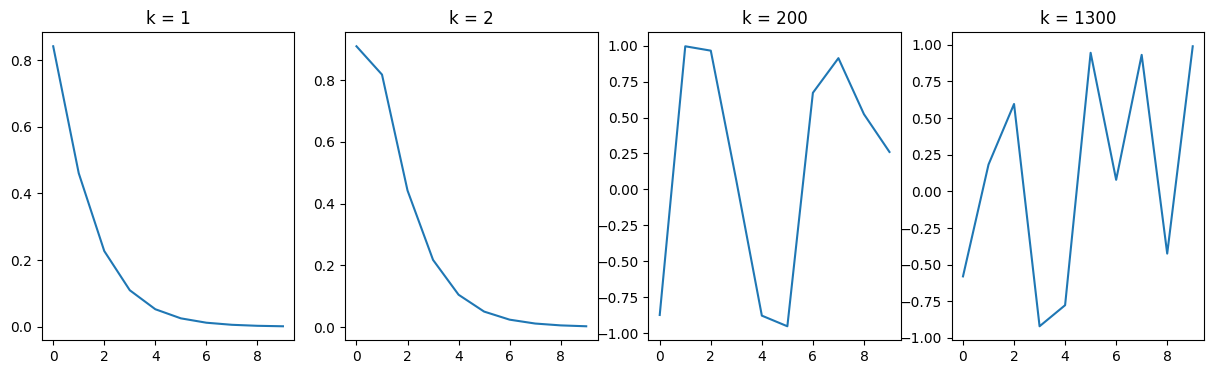

In [27]:
## ROUGH WORK POSITIONAL EMBEDDING
import matplotlib.pyplot as plt
import numpy as np

def plotSinusoid(k, d=25, n=10000):
    x = np.arange(0, 10, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    print('Yo', y.shape, denominator.shape)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
 
fig = plt.figure(figsize=(15, 4))    
for i,ele in enumerate([1,2,200,1300]):
    plt.subplot(141 + i)
    plotSinusoid(ele)


In [73]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P
 
P = getPositionEncoding(seq_len=90, d=1, n=10000)
print(P)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [75]:
def deg2rad(degree):
    return degree*np.pi/180

def rad2deg(radian):
    return radian*180/np.pi

def getPosition(pos_enc, d, n=10000):
    #print(pos_enc[1], pos_enc.shape, pos_enc.shape[0])
    print(np.sin(deg2rad(30)))
    print(rad2deg(np.arcsin(0.49999999999999994)))

    pos_list = []
    for k in range(3,pos_enc.shape[0]):
        print(pos_enc[k])
        for i in range(d):
            theta = np.arcsin(pos_enc[k][i])
            pos = theta*np.power(n, 2*i/d)
            pos_list.append(pos)
        break
        
    print('Euuu', pos_list)

        

    

getPosition(P, 1)

0.49999999999999994
29.999999999999996
[0.]
Euuu [0.0]
